Stochastic Modelling and Simulation project:
Multi-Robot Target Search using Probabilistic Consensus on Discrete Markov Chains.

In [2]:
import numpy as np
from Utils.DTMC_Utils import DTMC_Utils
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

In [2]:
np.random.seed(12345)


Experimental parameter:

In [3]:
N = 3 # number of agents

alpha = 0.33 # to be chosen in (0, 1/d_max) <- d_max = N-1

map_width = 5 # (meters)
map_height = 5

S = map_width * map_height # number of nodes (locations)


Graph initialization:

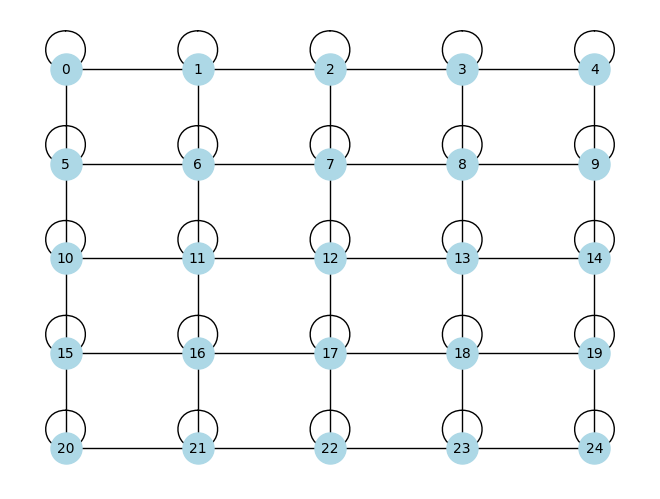

In [4]:
grid_graph = GridGraph(map_width, map_height)
grid_graph.plot_graph() 

In [5]:
def getRandomTarget(num_of_nodes, num_of_node_target_visible=3):
    """This method generates a list of consecutive nodes starting from a random node, ensuring the sequence stays within the total node range."""
    
    start_node = np.random.randint(0, num_of_nodes - num_of_node_target_visible + 1)
    target_nodes = [start_node + i for i in range(num_of_node_target_visible)]
    
    return target_nodes

Target init:

In [6]:
reference_information_state = 1
# Z_r = [4, 5, 6] 
Z_r = getRandomTarget(S)
print("The reference information state is: " + str(reference_information_state))
print("Target is observable from nodes: " + str(Z_r))

The reference information state is: 1
Target is observable from nodes: [2, 3, 4]


Agents init:

In [7]:
agents = DTMC_Utils.initAgents(N,S)
for ag in agents:
    print(ag)

Agent ID: 1, 
Position: 5 
Information state: 0.3163755545817859

Agent ID: 2, 
Position: 4 
Information state: 0.03975949588835437

Agent ID: 3, 
Position: 5 
Information state: 0.5320779204036645


Graph class representing agent's environment

Finished. Information State Vector: [[1.]
 [1.]
 [1.]
 [1.]]


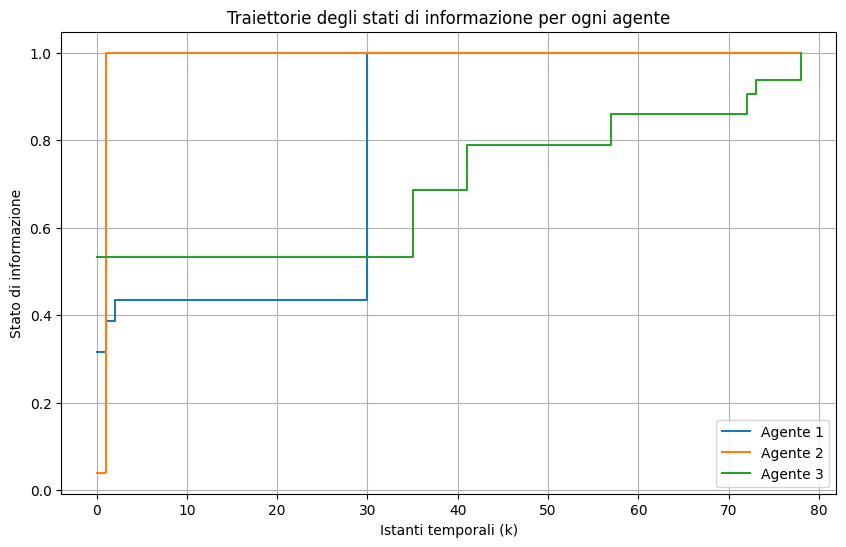

In [8]:
experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
experiment.run()
print(f"Finished. Information State Vector: {experiment.getInformationStateVector()}")        
experiment.plot_agents_information_state_trajectories()
#print(f"{experiment.getIterationNumber()} iterazioni in {experiment.getExecutionTime()} secondi")

In [9]:
def plot_average_execution_time(agents_number_list, average_execution_time_list, std_deviation_list, x_label):
    plt.figure(figsize=(8, 6))
    
    plt.errorbar(
        agents_number_list, average_execution_time_list, yerr=std_deviation_list,
        fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label='Average Execution Time'
    )
    
    plt.xlabel(x_label)
    plt.ylabel("Average Execution Time (iterations)")
    plt.title("Average Execution Time vs Number of Agents")
    plt.legend()
    plt.grid(True)
    
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

Average time until consensus vs number of agents 

Average time until consensus vs grid_dimension

In [12]:
num_of_experiments = 1000
agent_numbers = [3, 5, 7, 9]
# grid_dimensions = [5, 8, 10, 12, 15, 20]
grid_dimensions = [5, 8, 10, 12]
alpha = 1

X, Y = np.meshgrid(agent_numbers, grid_dimensions)
Z = np.zeros_like(X, dtype=float)
Z_std = np.zeros_like(X, dtype=float)

for i, agent_number in tqdm(enumerate(agent_numbers), desc="Processing Agents", total=len(agent_numbers)):
    print(f"Processing agent: {agent_number}")
    
    for j, grid_dimension in tqdm(enumerate(grid_dimensions), desc=f"Grid Processing", leave=False, total=len(grid_dimensions)):
        nodesNumber = grid_dimension * grid_dimension
        grid_graph = GridGraph(grid_dimension, grid_dimension)
        consensus_times = []
        
        for k in range(num_of_experiments):
            agents = DTMC_Utils.initAgents(agent_number, nodesNumber)
            experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
            experiment.run()
            consensus_times.append(experiment.getMeanConsensusTime())
        
        Z[j, i] = np.mean(consensus_times)
        Z_std[j, i] = np.std(consensus_times)



Processing Agents:   0%|          | 0/4 [00:00<?, ?it/s]

Processing agent: 3



Processing Agents:  25%|██▌       | 1/4 [06:06<18:19, 366.42s/it]A

Processing agent: 5



Processing Agents:  50%|█████     | 2/4 [12:21<12:22, 371.30s/it]A

Processing agent: 7



Processing Agents:  75%|███████▌  | 3/4 [19:27<06:36, 396.50s/it]A

Processing agent: 9



Processing Agents: 100%|██████████| 4/4 [25:22<00:00, 380.58s/it]A


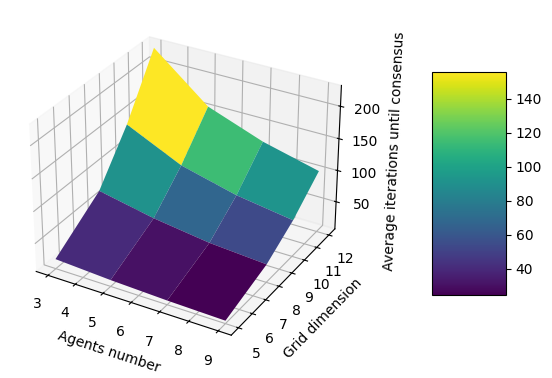

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

cbar = fig.colorbar(surf, ax=ax, pad=0.15, aspect=3)

ax.set_xlabel('Agents number')
ax.set_ylabel('Grid dimension')
ax.set_zlabel('Average iterations until consensus')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [14]:
output_file = 'experiment_data_full.npz'

# Salva i dati come un file .npz, inclusi X e Y
np.savez(output_file, X=X, Y=Y, Z=Z, Z_std=Z_std, agent_numbers=agent_numbers, grid_dimensions=grid_dimensions)

print(f"Tutti i dati salvati correttamente in {output_file}")

Tutti i dati salvati correttamente in experiment_data_full.npz


Alpha parameter analysis:

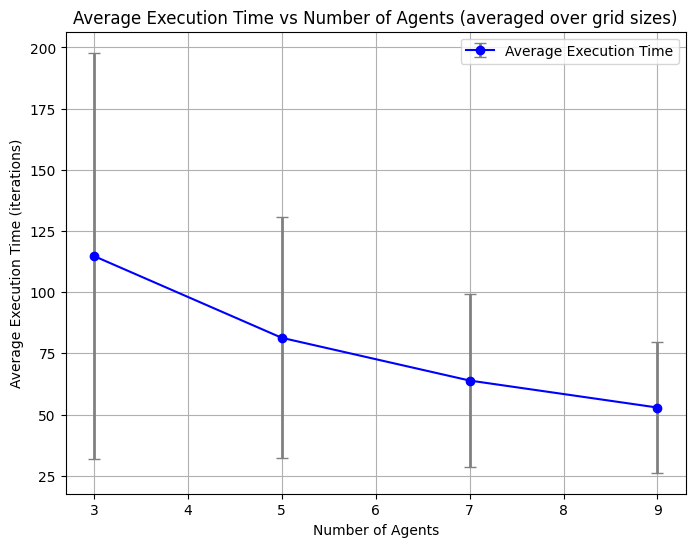

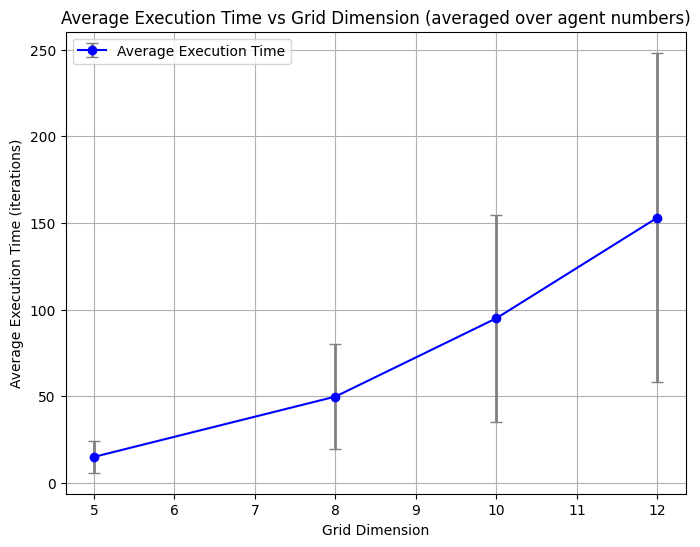

In [15]:
# Media i valori di Z e Z_std per ogni numero di agenti (fisso X e varia Y)
Z_mean_over_grids = np.mean(Z, axis=0)
Z_std_over_grids = np.mean(Z_std, axis=0)

# Media i valori di Z e Z_std per ogni dimensione di griglia (fisso Y e varia X)
Z_mean_over_agents = np.mean(Z, axis=1)
Z_std_over_agents = np.mean(Z_std, axis=1)

# Plot con X (numero di agenti) e Y mediato
DTMC_Utils.plot_average_execution_time(
    agent_numbers, Z_mean_over_grids, Z_std_over_grids, 
    "Number of Agents", "Average Execution Time vs Number of Agents (averaged over grid sizes)"
)

# Plot con Y (dimensione della griglia) e X mediato
DTMC_Utils.plot_average_execution_time(
    grid_dimensions, Z_mean_over_agents, Z_std_over_agents, 
    "Grid Dimension", "Average Execution Time vs Grid Dimension (averaged over agent numbers)"
)

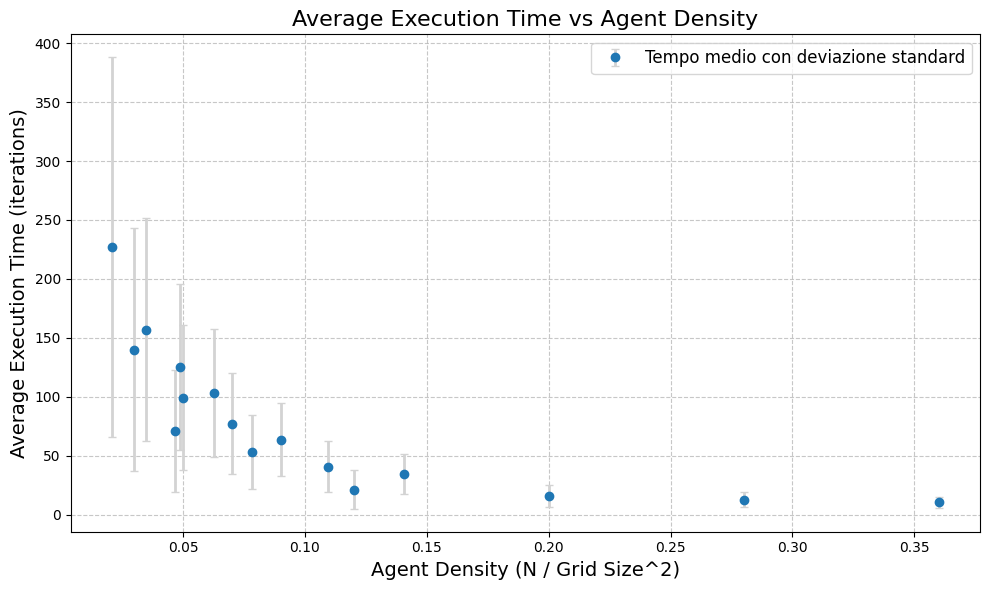

In [5]:
data = np.load('experiment_data_full.npz')

X = data['X'] 
Y = data['Y']
Z = data['Z']  
Z_std = data['Z_std'] 
agent_numbers = data['agent_numbers']
grid_dimensions = data['grid_dimensions']

density = X / (Y ** 2)

density_flat = density.flatten()
consensus_time_flat = Z.flatten()
consensus_time_std_flat = Z_std.flatten()

sorted_indices = np.argsort(density_flat)
density_sorted = density_flat[sorted_indices]
consensus_time_sorted = consensus_time_flat[sorted_indices]
consensus_time_std_sorted = consensus_time_std_flat[sorted_indices]

# Plot dei dati
plt.figure(figsize=(10, 6))
plt.errorbar(
    density_sorted,
    consensus_time_sorted,
    yerr=consensus_time_std_sorted,
    fmt='o',
    ecolor='lightgray',
    elinewidth=2,
    capsize=3,
    label='Tempo medio con deviazione standard'
)

# Personalizza il grafico
plt.title('Average Execution Time vs Agent Density', fontsize=16)
plt.xlabel('Agent Density (N / Grid Size^2)', fontsize=14)
plt.ylabel('Average Execution Time (iterations)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostra il grafico
plt.show()